In [94]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display, HTML
from matplotlib import animation

In [95]:
def plot_sequence_images(image_array):
    ''' Display images sequence as an animation in jupyter notebook
    
    Args:
        image_array(numpy.ndarray): image_array.shape equal to (num_images, height, width, num_channels)
    '''
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[:2]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=33, repeat_delay=1, repeat=True)
    display(HTML(anim.to_html5_video()))

In [156]:
l2_loss = lambda im1, im2: ((im1 - im2)**2).mean()
l1_loss = lambda im1, im2: np.abs(im1 - im2).mean()
linf_loss = lambda im1, im2: np.max(np.abs(im1 - im2)).mean()

def genetic_step(im_true, im, popsize=10, loss_fn=l2_loss):
    min_loss = loss_fn(im_true, im)
    im_next = im
    for _ in range(popsize):
        mutation_i = np.random.randint(0, im.shape[0])
        mutation_j = np.random.randint(0, im.shape[1])
        mutation_k = np.random.randint(0, im.shape[2])
        mutation_size = np.random.normal(0, 10)
        mutant = im.copy()
        mutant[mutation_i, mutation_j, mutation_k] = mutation_size
        loss = loss_fn(im_true, mutant)
        if loss < min_loss:
            min_loss = loss
            im_next = mutant
    return im_next

def gilespie_step(im_true, im, loss_fn=l2_loss):
    min_loss = loss_fn(im_true, im)
    mutation_i = np.random.randint(0, im.shape[0])
    mutation_j = np.random.randint(0, im.shape[1])
    mutation_k = np.random.randint(0, im.shape[2])
    mutation_size = np.random.normal(0, 10)
    mutant = im.copy()
    mutant[mutation_i, mutation_j, mutation_k] = mutation_size
    loss = loss_fn(im_true, mutant)
    if loss < min_loss:
        return mutant
    else:
        p = np.exp(min_loss) / np.exp(loss + min_loss)
        ret = np.random.binomial(1, p)
        if ret == 0:
            return im
        else:
            return mutant

In [159]:
im_true = np.array(Image.open('cpcb_logo.png'))
im = np.zeros_like(im_true)

ims = [im]
for i in range(200000):
    print(i, end='\r')
#     im = genetic_step(im_true, im, popsize=10, loss_fn=l1_loss)
    im = gilespie_step(im_true, im, loss_fn=l1_loss)
#     if i % 10000 == 0:
#         plt.imshow(im)
#         plt.show()
    if i % 1000 == 0:
#         plt.imshow(im)
#         plt.show()
        ims.append(im)

In [160]:
plot_sequence_images(ims)

<Figure size 88x100 with 0 Axes>

In [161]:
np.save('results/gilespie_var1_l1.npy', ims)

## Cellular automata
Propagation of pixels based on simple rules. 

Simplest: convolution

In [177]:
def propagate(im):
    for i in range(1, im.shape[0] - 1):
        for j in range(1, im.shape[1] - 1):
            window = im[i-1:i+2, j-1:j+2]
            conv = window.mean(axis=(0, 1))
            im[i,j] = conv
    return im

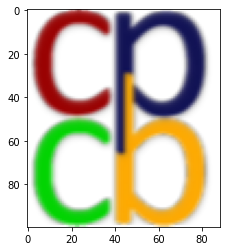

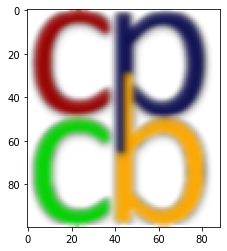

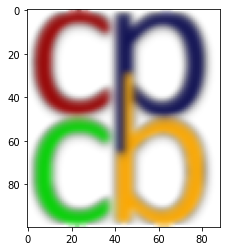

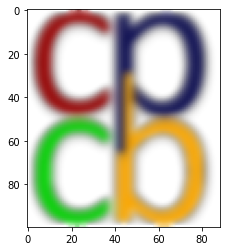

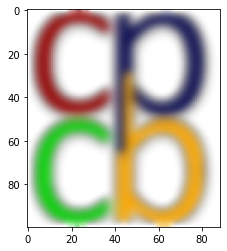

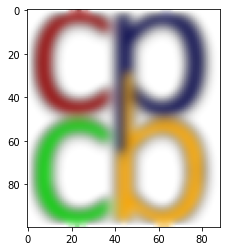

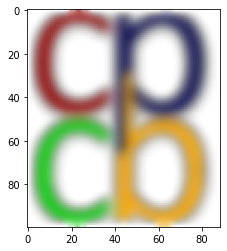

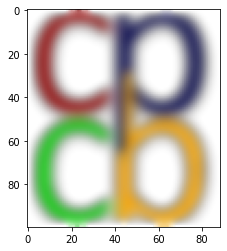

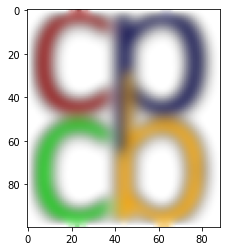

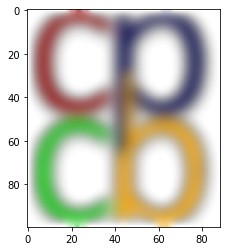

In [178]:
im = np.array(Image.open('cpcb_logo.png'))
ims = [im]
for i in range(10):
    im = propagate(im)
    if i % 1 == 0:
        ims.append(im)
        plt.imshow(im)
        plt.show()

## Annealing dynamics
Blobs with affinity to certain parts of an image or other blobs based on true coordinates (binding affinity based on true x-y coords), random bouncing + binding or global attraction

Folding: random walk w simulated annealing to cpcb logo? Maybe on a lattice

In [180]:
# visualizing blobs -- dna helix viz to test
# binding dynamics: random blob starting locations, no collisions, gravity toward correct location
# next, random walk with global affinity
# next, random walk with pairwise affinity. Ground some blobs to 